Import Libaries

In [52]:
import pandas as pd
import numpy as np

Decide which movie should be investigated and plotted. Set star wars four (swiv) to true if yozu want to analyze this movie. If you want to analyze the seventh movie (swvii), you have to set swiv to false.

In [53]:
swiv = False


In [54]:
if swiv == True:
    data = pd.read_csv("swiv.csv")
else:
    data = pd.read_csv("swvii.csv")

In [55]:
data.head()


,name,phrase,numberOfWords
0,POE,Well because of you now we have a chance The G...,18
1,POE,We've got company,3
2,POE,You have to hide,4
3,POE,Come on BB-8 Hurry,4
4,POE,I see 'em,3


How many times does an actor say something?

In [56]:
actor_names = data['name'].value_counts()
top_actor_names = actor_names.head(13)
print(top_actor_names)


FINN           154
REY            150
HAN            141
POE             64
KYLO REN        61
LEIA            28
GENERAL HUX     25
MAZ             19
C-3PO           14
SNOKE           14
Name: name, dtype: int64


In [58]:
if swiv == True:
    top_actor_names = top_actor_names.drop(['RED LEADER','TROOPER','GOLD LEADER'], axis=0)

In [59]:
actorDF = pd.DataFrame()
indexList=[]

actorDF['actor'] = top_actor_names.index
for i in range(len(top_actor_names)):
    indexList.append(top_actor_names.iloc[i])
    
indexDF = pd.DataFrame(indexList)  
actorDF['timesSpoken'] = indexDF

In [60]:
actorDF

,actor,timesSpoken
0,FINN,154
1,REY,150
2,HAN,141
3,POE,64
4,KYLO REN,61
5,LEIA,28
6,GENERAL HUX,25
7,MAZ,19
8,C-3PO,14
9,SNOKE,14


In [61]:
#access name via index 
print(top_actor_names.index[0])
# access number of mentioned name via iloc
print(top_actor_names.iloc[0])

FINN
154


Add gender column

In [62]:
gender = []
gender.append('male')
gender.append('female')
gender.append('male')
gender.append('male')
gender.append('male')
gender.append('female')
gender.append('male')
gender.append('male')
gender.append('none')
gender.append('male')
genderDF = pd.DataFrame(gender)
actorDF['gender'] = genderDF

In [63]:
print(actorDF)

         actor  timesSpoken  gender
0         FINN          154    male
1          REY          150  female
2          HAN          141    male
3          POE           64    male
4     KYLO REN           61    male
5         LEIA           28  female
6  GENERAL HUX           25    male
7          MAZ           19    male
8        C-3PO           14    none
9        SNOKE           14    male


How many words does each of the top actors say?

In [64]:
top_actors_count = len(top_actor_names)
numberList = [] 

for i in range(len(top_actor_names)):
    indexActor = top_actor_names.index[i]
    nameActor = data[data['name']==indexActor]
    numberList.append(nameActor['numberOfWords'].sum())
    
    
numberDF = pd.DataFrame(numberList)
actorDF['numberOfWords'] = numberDF

In [65]:
actorDF

,actor,timesSpoken,gender,numberOfWords
0,FINN,154,male,1135
1,REY,150,female,958
2,HAN,141,male,1186
3,POE,64,male,590
4,KYLO REN,61,male,582
5,LEIA,28,female,240
6,GENERAL HUX,25,male,311
7,MAZ,19,male,257
8,C-3PO,14,none,179
9,SNOKE,14,male,136


Bubble charts

In [66]:
import plotly.express as px
df = px.data.gapminder()

fig = px.scatter(actorDF, x="numberOfWords", y="timesSpoken", color="gender", hover_name="actor", log_x=True, size_max=60, width=1000, 
title="Scatterplot of times spoken and number of words for each character. <br>To see which character has spoken how many times and how many words, hover above each point.")
fig.show()


In [67]:
male = actorDF[actorDF['gender']=="male"]
print(male)
male['numberOfWords'].sum()
numberOfWordsMale = male['numberOfWords'].sum()

female = actorDF[actorDF['gender']=="female"]
print(female)
female['numberOfWords'].sum()
numberOfWordsFemale = female['numberOfWords'].sum()

none = actorDF[actorDF['gender']=="none"]
print(none)
none['numberOfWords'].sum()
numberOfWordsNone = none['numberOfWords'].sum()

         actor  timesSpoken gender  numberOfWords
0         FINN          154   male           1135
2          HAN          141   male           1186
3          POE           64   male            590
4     KYLO REN           61   male            582
6  GENERAL HUX           25   male            311
7          MAZ           19   male            257
9        SNOKE           14   male            136
  actor  timesSpoken  gender  numberOfWords
1   REY          150  female            958
5  LEIA           28  female            240
   actor  timesSpoken gender  numberOfWords
8  C-3PO           14   none            179


[4197, 1198, 179]


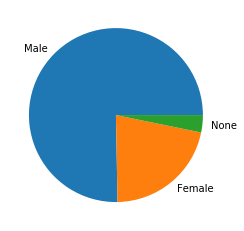

<Figure size 432x288 with 0 Axes>

In [68]:
import matplotlib.pyplot as plt


genderData = [numberOfWordsMale, numberOfWordsFemale, numberOfWordsNone]
print(genderData)
genderLabel = ['Male', 'Female', 'None']

plt.pie(genderData, labels=genderLabel)
plt.show()
if swiv == True:
    plt.savefig('numberOfWordsGender_swiv.png')
else:
    plt.savefig('numberOfWordsGender_swvii.png')

In [69]:
male = actorDF[actorDF['gender']=="male"]
print(male)
male['timesSpoken'].sum()
timesSpokenMale = male['timesSpoken'].sum()

female = actorDF[actorDF['gender']=="female"]
print(female)
female['timesSpoken'].sum()
timesSpokenFemale = female['timesSpoken'].sum()

none = actorDF[actorDF['gender']=="none"]
print(none)
none['timesSpoken'].sum()
timesSpokenNone = none['timesSpoken'].sum()

         actor  timesSpoken gender  numberOfWords
0         FINN          154   male           1135
2          HAN          141   male           1186
3          POE           64   male            590
4     KYLO REN           61   male            582
6  GENERAL HUX           25   male            311
7          MAZ           19   male            257
9        SNOKE           14   male            136
  actor  timesSpoken  gender  numberOfWords
1   REY          150  female            958
5  LEIA           28  female            240
   actor  timesSpoken gender  numberOfWords
8  C-3PO           14   none            179


[478, 178, 14]


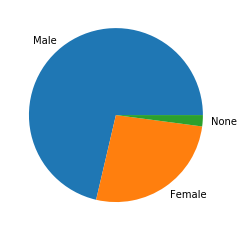

<Figure size 432x288 with 0 Axes>

In [70]:
import matplotlib.pyplot as plt


genderData = [timesSpokenMale, timesSpokenFemale, timesSpokenNone]
print(genderData)
genderLabel = ['Male', 'Female', 'None']

plt.pie(genderData, labels=genderLabel)
plt.show()
if swiv == True:
    plt.savefig('timesSpokenGender_swiv.png')
else:
    plt.savefig('timesSpokenGender_swvii.png')

Summarize all the words of each male and female characters for the word cloud.

In [71]:
if swiv  == True:
    female_phrases = data[(data['name']=='LEIA') ]
    #female_phrases = female_words.phrase
    female_phrases.to_csv('female_phrases_swiv.txt', index=False, columns=['phrase'])
else:
    female_phrases = data[(data['name']=='REY') | (data['name']=='LEIA') ]
    #female_phrases = female_words.phrase
    female_phrases.to_csv('female_phrases_swvii.txt', index=False, columns=['phrase'])



In [72]:
if swiv  == True:
    male_phrases = data[(data['name']!='LEIA') | (data['name']!='THREEPIO')]
    #male_phrases = male_words.phrase
    male_phrases.to_csv('male_phrases_swiv.txt', index=False, columns=['phrase'])
else:
    male_phrases = data[(data['name']!='REY') | (data['name']!='LEIA') | (data['name']=='C-3PO') ]
    #male_phrases = male_words.phrase
    male_phrases.to_csv('male_phrases_swvii.txt', index=False, columns=['phrase'])